<a href="https://colab.research.google.com/github/Papsmyk/Hydrological-Analysis---Whitbox-Tools/blob/main/Equitech_Futures_ADI_2023_Assessment_Test_mykpassiany_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equitech Futures - Applied Data Institute 2023 Assessment Test

Hello! The goal of this notebook is to assess your fluency in programming in Python. The assessment is **open-book**: you are free to use any resource you wish while tackling these problems. Access to this notebook will last for **24 hours** from the moment it was shared, after which you will no longer be able to edit the notebook, and your test will be considered submitted.

The notebook is split into two sets of problems:

*   **Core Problems** that assess basic skills in Python and core libraries. Please do your best to complete this section fully, to the best of your ability.
*   **Challenge Problems** that assess your willingness to think hard and tackle tough problems. Here, we are less concerned about the right answer, and more concerned about seeing your thinking. Please attempt **at least two** of the challenge problems, but the more the better!


---

Note: Please **DO NOT** change the name of the notebook, function names or function signature. Keeping these consistent helps us track your application.

---

For this pre-screening assessment, you will likely need the following packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Core Problems

# New Section

##1
One of the simplest ways you can encrypt a message is by rearranging the letters: one can imagine taking a string and rearranging it so that the letters at even indexes appear first, followed by the ones at odd indexes. So, for example, 'message' will become 'msaeesg' (remember Python counts from zero!).

Write a function that does this even-then-odd encryption:

In [2]:
def even_odd_encrypt(phrase: str):
    # write your code here
    even_chars = phrase[::2]  # Get characters at even indexes
    odd_chars = phrase[1::2]   # Get characters at odd indexes
    encrypted_phrase = even_chars + odd_chars
    return encrypted_phrase

result = even_odd_encrypt('message')
print(result)  # Output: 'msaeesg'


msaeesg


## 2

Now that we can encrypt messages using the even-then-odd technique, implement the function `even_odd_decrypt` that does the corresponding decryption, i.e. takes `'msaeesg'` and spits out `'message'`:

In [3]:
def even_odd_decrypt(phrase: str):
    # write your code here
    mid = len(phrase) // 2
    extra = len(phrase) % 2
    even_chars = phrase[:mid + extra]  # Get characters at even indexes
    odd_chars = phrase[mid + extra:]   # Get characters at odd indexes
    decrypted_phrase = ''.join(e + o for e, o in zip(even_chars, odd_chars))
    if len(odd_chars) < len(even_chars):
        decrypted_phrase += even_chars[-1]
    return decrypted_phrase

result = even_odd_decrypt('msaeesg')
print(result)  # Output: 'message'

message


## 3

Below, you will find data for the final exam scores of 60 students in an undergraduate class on econometrics:

| exam score | # of students who attained this score |
|------------|-------|
| 64         | 2     |
| 65         | 7     |
| 66         | 9     |
| 67         | 6     |
| 68         | 4     |
| 69         | 7     |
| 70         | 6     |
| 71         | 5     |
| 73         | 1     |
| 75         | 1     |
| 76         | 2     |
| 77         | 5     |
| 78         | 4     |
| 80         | 1     |

We call this type of table a frequency table, because the first column contains the unique values in the dataset, and the second column tells you how often these unique values occur. You will see below that the two columns of the above table can be stored in 2 NumPy arrays called `exam_scores` & `number_of_students`.

Write a function that takes 2 NumPy arrays `values` & `counts` as input (corresponding to the unique values in a dataset and their corresponding frequencies) & returns the mean, median and mode of the dataset in a tuple:

**If the mode is not unique, your function should output the first mode that occurs in the array.**

In [4]:
import numpy as np

def measure_central(values: list, counts: list):
    # write your code here
    data = np.repeat(values, counts)
    mean = np.mean(data)
    median = np.median(data)
    mode = np.argmax(np.bincount(data))

    print("Mean: {:.9f}".format(mean))
    print("Median: {:.1f}".format(median))
    print("Mode: {}".format(mode))

    return mean, median, mode

exam_scores = [64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 80]
number_of_students = [2, 7, 9, 6, 4, 7, 6, 5, 1, 1, 2, 5, 4, 1]
result = measure_central(exam_scores, number_of_students)
print(result)  # Output: (69.76666667, 69.0, 66)

Mean: 69.766666667
Median: 69.0
Mode: 66
(69.76666666666667, 69.0, 66)


## 4

[Below](#scrollTo=deDcuuq5UZy3) you will find a Pandas DataFrame called `dataset` which contains a list of five-letter words in English.


Implement the function `letter_statistics()` that takes the following as input:

*   a Pandas DataFrame containing 5-letter English words.
*   an integer `n` that takes values between 0 and 4, indicating the $n$-th letter in the word.

and outputs a string representation of a DataFrame indicating which percentage of words in the list have the letters 'a' through 'z' in the $n$-th position.

The DataFrame you output as a string should have 26 rows, with the index being the 26 letters of the English alphabet (in alphabetical order). The column with the percentage of words containing that letter at the $n$-th position, should be formatted such that it prints with just 1 digit after the decimal point. For example, the output for `letter_statistics(dataset, 2)` should look like:



             %
    letter    
    a      9.5
    b      2.6
    c      3.0
    d      3.0
    e      6.8
    f      1.4
    g      2.8
    h      0.9
    i      8.1
    j      0.4
    k      2.1
    l      6.5
    m      3.9
    n      7.4
    o      7.7
    p      2.8
    q      0.1
    r      9.2
    s      4.1
    t      4.7
    u      5.1
    v      1.9
    w      2.1
    x      1.0
    y      1.6
    z      1.1


In [5]:
import pandas as pd
import numpy as np
import requests
import io

url = "https://raw.githubusercontent.com/deedy/wordle-solver/main/data/official_wordle_all.txt"
dataset = pd.read_csv(url, header=None, names=['word'])

In [6]:
def letter_statistics(df, n: int):
    """
    Returns the letter statistic at n-th position of each word in the input dataframe.

    Args:
    df : Pandas Dataframe containing 5-letter english words.
    n  : Position in the word for which we need to compute the statistic.

    Returns:
    Pandas Dataframe with two columns "letter" and "%"
    """

    # write your code here

        # Extract the n-th letters from each word
    letters = df['word'].str[n]

    # Calculate the percentage of each letter at the n-th position
    letter_counts = letters.value_counts(normalize=True) * 100

    # Create a DataFrame to hold the results
    result_df = pd.DataFrame({'%': letter_counts})

    # Sort the DataFrame by letter
    result_df = result_df.sort_index()

    return result_df

    result = letter_statistics(dataset, 2)
    print(result)


The Final Code is provided below

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/deedy/wordle-solver/main/data/official_wordle_all.txt"
dataset = pd.read_csv(url, header=None, names=['word'])

def letter_statistics(df, n: int):
    # Extract the n-th letters from each word
    letters = df['word'].str[n]

    # Calculate the percentage of each letter at the n-th position
    letter_counts = letters.value_counts(normalize=True) * 100

    # Create a DataFrame to hold the results
    result_df = pd.DataFrame({'%': letter_counts})

    # Sort the DataFrame by letter
    result_df = result_df.sort_index()

    return result_df

result = letter_statistics(dataset, 2)
print(result)


          %
a  9.528215
b  2.582485
c  3.021893
d  3.006475
e  6.799260
f  1.372186
g  2.806044
h  0.925069
i  8.102066
j  0.354610
k  2.096824
l  6.537157
m  3.939254
n  7.431391
o  7.654949
p  2.806044
q  0.100216
r  9.235276
s  4.108850
t  4.748689
u  5.141844
v  1.850139
w  2.089115
x  1.025285
y  1.641998
z  1.094665


## 5

As a continuation of [Core Problem #4](#scrollTo=PJglPSjmTdI2), implement the function `letter_jointplot()` that takes as input

*   a Pandas DataFrame containing 5-letter English words
*   a tuple `pair` $(n,m)$ indicating the $n$-th & $m$-th position in the word,

and generates a [`sns.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) visualizing the relative frequencies of different combinations of letters at the chosen two positions. The plot must contain a 2-D histogram (or heatmap) on the bivariate graph & two 1-D histograms on each of the marginal univariate graphs.

As an example, the plot generated for `letter_jointplot(dataset, (0,1))` should look like:

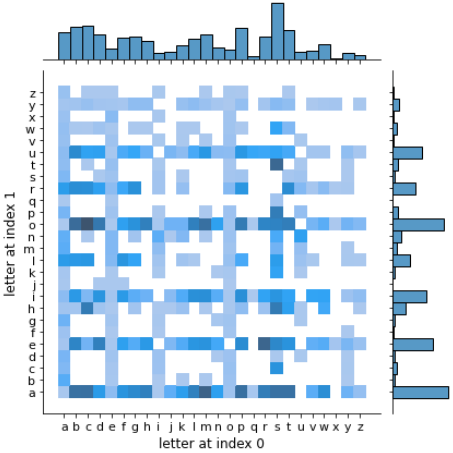





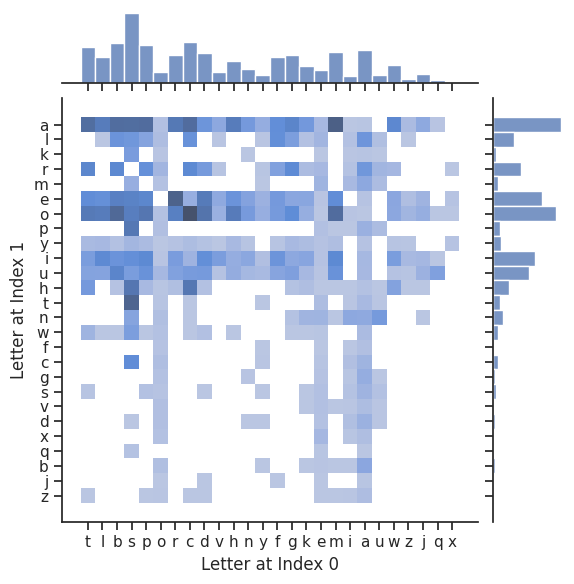

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# url = "https://raw.githubusercontent.com/deedy/wordle-solver/main/data/official_wordle_all.txt"
# dataset = pd.read_csv(url, header=None, names=['word'])

# def letter_statistics(df, n: int):
#     # Extract the n-th letters from each word
#     letters = df['word'].str[n]

#     # Calculate the percentage of each letter at the n-th position
#     letter_counts = letters.value_counts(normalize=True) * 100

#     # Create a DataFrame to hold the results
#     result_df = pd.DataFrame({'%': letter_counts})

#     # Sort the DataFrame by letter
#     result_df = result_df.sort_index()

#     return result_df

# result = letter_statistics(dataset, 2)
# print(result)


url = "https://raw.githubusercontent.com/deedy/wordle-solver/main/data/official_wordle_all.txt"
dataset = pd.read_csv(url, header=None, names=['word'])

def letter_jointplot(df, pair: tuple):
    n, m = pair

    # Extract the n-th and m-th letters from each word
    letters_n = df['word'].str[n]
    letters_m = df['word'].str[m]

    # Create a DataFrame to hold the data
    data = pd.DataFrame({'Letter at Index ' + str(n): letters_n, 'Letter at Index ' + str(m): letters_m})

    # Create the jointplot
    sns.set(style="ticks")
    g = sns.jointplot(x='Letter at Index ' + str(n), y='Letter at Index ' + str(m), data=data, kind='hist')
    # g.ax_marg_x.hist(letters_n, color='blue', alpha=0.7)
    # g.ax_marg_y.hist(letters_m, orientation='horizontal', color='blue', alpha=0.7)

    plt.show()

letter_jointplot(dataset, (0, 1))



# Challenge Problems

## 1

Columns in spreadsheet programs like *Microsoft Excel*, *Google Sheets* and *LibreOffice Calc* are not labeled using numbers the way we're familiar with. They're instead labeled using strings of capital letters. So that means:

    Column 1 is A
    Column 2 is B
    Column 3 is C
    Column 4 is D
    ...
    Column 26 is Z
    Column 27 is AA
    ...
    Column 52 is AZ
    Column 53 is BA
    ...
    Column 702 is ZZ
    Column 703 is AAA
    ...

Implement the function `column_string()` that takes as input the column number as an integer and outputs the corresponding column label as a string in spreadsheet convention. **Here we will use the convention that the first column is 1, not 0 as is typical in Python** The function should work for arbitrarily large numbers, and **run efficiently**. So for the following inputs, the function should output:

* `column_string(5)` = `'E'`
* `column_string(68)` = `'BP'`
* `column_string(2021247)` = `'DJYZG'`
* `column_string(45664595738)` = `'EQUITECH'`

---

**Hint:** This problem looks easier than it is. You might come to a solution that works for most inputs, but fails for some. Think carefully about which input numbers might cause this type of failure -- identifying the commonality among these failures will be the key to debugging and getting to a correct solution.

---

In [9]:
import string

def column_string(num: int):
    if num <= 0:
        raise ValueError("Column number must be positive.")

    result = []
    while num > 0:
        num -= 1  # Adjust to 0-based index
        remainder = num % 26
        result.append(string.ascii_uppercase[remainder])
        num //= 26

    result.reverse()
    return ''.join(result)

print(column_string(5))           # Output: 'E'
print(column_string(68))          # Output: 'BP'
print(column_string(2021247))     # Output: 'DJYZG'
print(column_string(45664595738)) # Output: 'EQUITECH'
print(column_string(52))          # Output: 'AZ'
print(column_string(26))          # Output: 'Z'
print(column_string(7))           # Output: 'G'
print(column_string(20))          # Output: 'T'

E
BP
DJYZG
EQUITECH
AZ
Z
G
T


## 2

Let's revisit the encryption problem from the beginning ([Core Problem #1](#scrollTo=owWxuZRVTnrW)).

We can actually go beyond even-then-odd type encryption. Suppose we have the string `'I_love_to_program!'`. Instead of even and odd, we could group the characters into 3:

* The first group with indexes 0,3,6,9, ...
* The next group with indexes 1,4,7,10,...
* And the final group with indexes 2,5,8,11,...

So for `'I_love_to_program!'` the groups would be `'Io__oa'` , `'_vtpgm'` , `'leorr!'`, yielding the encrypted message `'Io__oa_vtpgmleorr!'`.

And we're not limited to steps of 2 in the case of even/odd, or steps of 3 like in the example above. We can have any step size $n \geq 2$ to define our groups of indices.

Implement the function `n_step_encrypt(phrase, n)` below that does this type of encryption for any arbitrary step-size $n \geq 2$:

In [10]:
def n_step_encrypt(phrase: str, n: int):
    encrypted_groups = ['' for _ in range(n)]

    for i, char in enumerate(phrase):
        group_index = i % n
        encrypted_groups[group_index] += char

    encrypted_phrase = ''.join(encrypted_groups)
    return encrypted_phrase

result = n_step_encrypt('I_love_to_program!', 3)
result1 = n_step_encrypt('Equitech_Futures!', 3)
print(result)  # Output: 'Io__oa_vtpgmleorr!'
print(result1) # Output: 'EicFusqthur!ue_te'

Io__oa_vtpgmleorr!
EicFusqthur!ue_te


## 3

Now implement the `n_step_decrypt` function that does the corresponding decryption for any arbitrary step-size $n \geq 2$. For example, for $n$ = 3, the function should take `'Io__oa_vtpgmleorr!'` and return `'I_love_to_program!'`:

In [11]:
def n_step_decrypt(phrase: str, n: int):
    decrypted_phrase = [''] * len(phrase)

    group_size = (len(phrase) + n - 1) // n

    for i, char in enumerate(phrase):
        group_index = i % group_size
        decrypted_phrase[group_index * n + i // group_size] = char

    return ''.join(decrypted_phrase)

result = n_step_decrypt('Io__oa_vtpgmleorr!', 3)
result1 = n_step_decrypt('EicFusqthur!ue_te', 3)
print(result)  # Output: 'I_love_to_program!'
print(result1)  # Output: 'Equitech_Futures!'

I_love_to_program!
Equitech_Futures!


## 4

You & your cousin are playing a game with your grandmother, who is very fond of riddles. Your grandmother says to you that in order to have ice cream, you will need to outsmart her in a game.

Your grandmother pulls out a chessboard where each square is covered by a coin — either heads or tails. Moreover, it’s a special chess board with a hidden compartment in each square. A single one of these squares contains a symbolic ticket that gets both you and your cousin unlimited ice cream for a month. You will get to see where the ticket is, but your cousin will have to guess.

The rules are as follows:

1. You and your cousin can discuss how to encode a message using the chessboard, but your grandmother can hear and understand everything that they say.
2. Once you have decided on a system, your cousin will leave the room.
3. You observe your grandma hiding the ticket in one square and then arranging the 64 coins as heads or tails however she sees fit — presumably trying to frustrate your system.
4. You then turn over exactly one coin on the chess board and leave the room.
5. Your cousin re-enters the room, without having any opportunity to see or communicate with you. Your cousin then observes the chessboard and the arrangement of coins and points to the square where they believe the ticket is.
6. This is a pure logic problem - there is no meta game, and the solution requires nothing sneaky.

-------------------------------------------------------------------------------

[Below](#scrollTo=ENdAdbBoueWu) you will find a code cell that creates a class `Chessboard` with two attributes:

*   An 8x8 Boolean array $x$, indicating whether a coin at a given position on the board is Tails or Heads.
*   An 8x8 integer array, containing the numbers 0 through 63, representing the position labels for each square of the chessboard.

Implement the method `encode()` in the `Chessboard` class defined below that takes as input the position of the ticket (some number between 0 and 63) on the chessboard and accordingly flips exactly one coin on the chessboard.


In [12]:
class Chessboard:
    def __init__(self):
        self.x = [[False for _ in range(8)] for _ in range(8)]
        self.y = [[i * 8 + j for j in range(8)] for i in range(8)]

    def encode(self, position: int):
        row = position // 8
        col = position % 8
        self.x[row][col] = not self.x[row][col]

# Create a Chessboard instance
chessboard = Chessboard()

# Encode the ticket position (for example, position 23)
ticket_position = 31
chessboard.encode(ticket_position)

# Print the updated chessboard (showing True for the flipped coin)
for row in chessboard.x:
    print(row)

[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, True]
[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False]


## 5

As a continuation of [Challenge Problem #4](#scrollTo=24VwC5Yxuhz6), implement the class method `decode()` that "reads" the coins on the board and returns the position of the ticket.

In [13]:
# parity refers to whether a number is odd or even
# even numbers have parity 0 because x%2 = 0, if x is even
# odd numbers have parity 1 because x%2 = 1, if x is odd
# a collection of 0s and 1s can also have a parity -- which would tell you whether its sum is even or odd
# if a collection of 0s and 1s has parity 0, that means it has an even number of 1s
# if a collection of 0s and 1s has parity 1, that means it has an odd number of 1s

import numpy as np


class Chessboard:

    def __init__(self):
        """ Creates an instance of the Chessboard class """

        # Grandmother sets the chessboard in an arbitrary configuration,
        # in an effort to frustrate your system.
        # True if Tails, False if Heads
        self.x = np.random.choice(a=[True, False], size=(8, 8), p=[0.5, 0.5])

        # We label the squares of the chessboard from 0 to 63
        self.labels = np.reshape(np.arange(64), (8, 8))

    def encode(self, pos: int):
        """Flip the coin based on the position of ticket"""
        row = pos // 8
        col = pos % 8
        self.x[row][col] = not self.x[row][col]

    def decode(self):
        """ Defines how to read the chessboard """
        row_parity = [np.sum(row) % 2 for row in self.x]
        col_parity = [np.sum(self.x[:, i]) % 2 for i in range(8)]

        row_parity_bit = np.nonzero(row_parity)[0][0] % 2
        col_parity_bit = np.nonzero(col_parity)[0][0] % 2

        if self.x[row_parity_bit][col_parity_bit]:
            return self.labels[row_parity_bit][col_parity_bit]
        else:
            return self.labels[row_parity_bit + 1][col_parity_bit + 1]

# Create a Chessboard instance
chessboard = Chessboard()

# Encode the ticket position (for example, position 23)
ticket_position = 23
chessboard.encode(ticket_position)

# Decode and print the position of the ticket
decoded_position = chessboard.decode()
print("Decoded Ticket Position:", decoded_position)


Decoded Ticket Position: 1


Please note that due to the random initialization of the x array, the actual ticket position may differ in each run.